In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics

In [16]:
df = pd.read_csv('vgsales_23.csv') 
df

Rank                                               Name Platform  \
0    14378               Hajime no Ippo: The Fighting! (2014)      PS3   
1     6926  Fallout 3 Game Add-On Pack: Broken Steel and P...     X360   
2     3597                         Monster High: Ghoul Spirit      Wii   
3     6546                                    Game of Thrones     X360   
4      276                                            FIFA 12     X360   
..     ...                                                ...      ...   
548  10081                                   Digimon World DS       DS   
549   6708                               Sentimental Graffiti      SAT   
550  11485                            Tomb Raider: Underworld       PC   
551   4524             Wonder Project J: Kikai no Shonen Pino     SNES   
552    398                                       WWF War Zone       PS   

       Year         Genre               Publisher  NA_Sales  EU_Sales  \
0    2014.0        Sports      Namco Bandai Games      0.00      0.00   
1    2009.0  Role-Playing      Bethesda Softworks      0.16      0.06   
2    2011.0          Misc                     THQ      0.44      0.08   
3    2012.0  Role-Playing  Focus Home Interactive      0.15      0.08   
4    2011.0        Sports         Electronic Arts      0.84      2.79   
..      ...           ...                     ...       ...       ...   
548  2006.0  Role-Playing      Namco Bandai Games      0.10      0.00   
549  1998.0     Adventure        NEC Interchannel      0.00      0.00   
550  2008.0        Action       Eidos Interactive      0.00      0.06   
551  1994.0    Simulation        Enix Corporation      0.00      0.00   
552  1998.0      Fighting   Acclaim Entertainment      2.47      0.76   

     JP_Sales  Other_Sales  Global_Sales  
0        0.03         0.00          0.03  
1        0.00         0.02          0.24  
2        0.00         0.04          0.56  
3        0.00         0.02          0.26  
4        0.02         0.53          4.19  
..        ...          ...           ...  
548      0.00         0.01          0.11  
549      0.25         0.00          0.25  
550      0.00         0.02          0.08  
551      0.43         0.00          0.43  
552      0.00         0.13          3.36  

[553 rows x 11 columns]

In [17]:
from sklearn.preprocessing import OrdinalEncoder


OEnc = OrdinalEncoder()

# Обучение OrdinalEncoder на уникальных значениях столбца "Genre"
OEnc.fit(df[["Platform"]])

transformed_data = OEnc.transform(df[["Platform"]])

df[["Platform"]] = OEnc.transform(df[["Platform"]]) #Перенос преобразованных данных в изначальный датасет
df #Вывод данных из датасета

Rank                                               Name  Platform  \
0    14378               Hajime no Ippo: The Fighting! (2014)      13.0   
1     6926  Fallout 3 Game Add-On Pack: Broken Steel and P...      21.0   
2     3597                         Monster High: Ghoul Spirit      19.0   
3     6546                                    Game of Thrones      21.0   
4      276                                            FIFA 12      21.0   
..     ...                                                ...       ...   
548  10081                                   Digimon World DS       3.0   
549   6708                               Sentimental Graffiti      17.0   
550  11485                            Tomb Raider: Underworld      10.0   
551   4524             Wonder Project J: Kikai no Shonen Pino      18.0   
552    398                                       WWF War Zone      11.0   

       Year         Genre               Publisher  NA_Sales  EU_Sales  \
0    2014.0        Sports      Namco Bandai Games      0.00      0.00   
1    2009.0  Role-Playing      Bethesda Softworks      0.16      0.06   
2    2011.0          Misc                     THQ      0.44      0.08   
3    2012.0  Role-Playing  Focus Home Interactive      0.15      0.08   
4    2011.0        Sports         Electronic Arts      0.84      2.79   
..      ...           ...                     ...       ...       ...   
548  2006.0  Role-Playing      Namco Bandai Games      0.10      0.00   
549  1998.0     Adventure        NEC Interchannel      0.00      0.00   
550  2008.0        Action       Eidos Interactive      0.00      0.06   
551  1994.0    Simulation        Enix Corporation      0.00      0.00   
552  1998.0      Fighting   Acclaim Entertainment      2.47      0.76   

     JP_Sales  Other_Sales  Global_Sales  
0        0.03         0.00          0.03  
1        0.00         0.02          0.24  
2        0.00         0.04          0.56  
3        0.00         0.02          0.26  
4        0.02         0.53          4.19  
..        ...          ...           ...  
548      0.00         0.01          0.11  
549      0.25         0.00          0.25  
550      0.00         0.02          0.08  
551      0.43         0.00          0.43  
552      0.00         0.13          3.36  

[553 rows x 11 columns]

In [18]:
df_encoded = pd.get_dummies(df, columns=['Name'])
df_encoded = df_encoded.dropna() 
df_encoded["Platform"] = np.where(df_encoded["Platform"] == 21.0, 1, 0)
df_encoded


Rank  Platform    Year         Genre               Publisher  NA_Sales  \
0    14378         0  2014.0        Sports      Namco Bandai Games      0.00   
1     6926         1  2009.0  Role-Playing      Bethesda Softworks      0.16   
2     3597         0  2011.0          Misc                     THQ      0.44   
3     6546         1  2012.0  Role-Playing  Focus Home Interactive      0.15   
4      276         1  2011.0        Sports         Electronic Arts      0.84   
..     ...       ...     ...           ...                     ...       ...   
548  10081         0  2006.0  Role-Playing      Namco Bandai Games      0.10   
549   6708         0  1998.0     Adventure        NEC Interchannel      0.00   
550  11485         0  2008.0        Action       Eidos Interactive      0.00   
551   4524         0  1994.0    Simulation        Enix Corporation      0.00   
552    398         0  1998.0      Fighting   Acclaim Entertainment      2.47   

     EU_Sales  JP_Sales  Other_Sales  Global_Sales  ...  \
0        0.00      0.03         0.00          0.03  ...   
1        0.06      0.00         0.02          0.24  ...   
2        0.08      0.00         0.04          0.56  ...   
3        0.08      0.00         0.02          0.26  ...   
4        2.79      0.02         0.53          4.19  ...   
..        ...       ...          ...           ...  ...   
548      0.00      0.00         0.01          0.11  ...   
549      0.00      0.25         0.00          0.25  ...   
550      0.06      0.00         0.02          0.08  ...   
551      0.00      0.43         0.00          0.43  ...   
552      0.76      0.00         0.13          3.36  ...   

     Name_X-Men Legends II: Rise of Apocalypse  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
..                                         ...   
548                                      False   
549                                      False   
550                                      False   
551                                      False   
552                                      False   

     Name_X-Men Origins: Wolverine - Uncaged Edition  Name_Xia-Xia  \
0                                              False         False   
1                                              False         False   
2                                              False         False   
3                                              False         False   
4                                              False         False   
..                                               ...           ...   
548                                            False         False   
549                                            False         False   
550                                            False         False   
551                                            False         False   
552                                            False         False   

     Name_Yakuza  Name_Yu-Gi-Oh! Forbidden Memories (JP sales)  \
0          False                                         False   
1          False                                         False   
2          False                                         False   
3          False                                         False   
4          False                                         False   
..           ...                                           ...   
548        False                                         False   
549        False                                         False   
550        False                                         False   
551        False                                         False   
552        False                                         False   

     Name_ZhuZhu Pets  Name_Zombi Daisuki  Name_Zoo Resort 3D  Name_ZooCube  \
0               False 

In [19]:
Y = df_encoded["Platform"]  # Выделение столбца "Platform" в переменную Y, которая будет содержать целевую переменную
X = df_encoded.drop(columns=["Platform", "Genre", "Publisher"])  # Создание переменной X, содержащей все столбцы, кроме "Platform", в качестве признаков

# Разделение данных на обучающую и тестовую выборки
# X_train и Y_train - обучающие признаки и целевая переменная
# X_test и Y_test - тестовые признаки и целевая переменная
# test_size = 0.2 означает, что 20% данных будут отведены для тестовой выборки
# random_state = 42 гарантирует воспроизводимость результатов
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [20]:
dtc = DecisionTreeClassifier();

dtc = dtc.fit(X_train, Y_train);

from sklearn import tree
plt.figure(figsize=(60,60),dpi=300);
tree.plot_tree(dtc,filled=True, fontsize = 20);

In [21]:
Y_predict = dtc.predict(X_test) #Проводим предсказание, по которому будем сверять

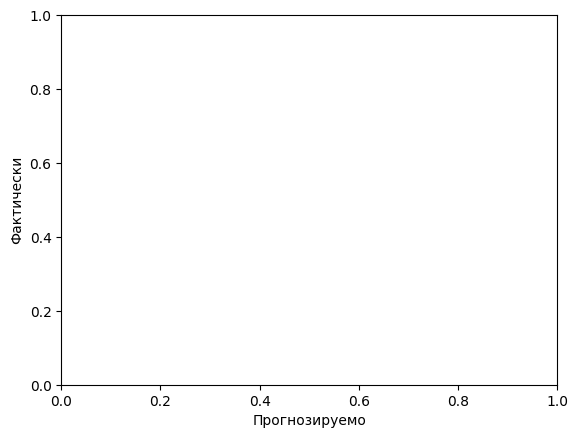

In [22]:
#sns.heatmap(con_mat, annot=True, fmt="d"); #Создание тепловой карты на основе матрицы ошибок
plt.xlabel("Прогнозируемо"); #Подпись на оси Х на тепловой карте
plt.ylabel("Фактически"); #Подпись на оси Y на тепловой карте

In [23]:
metrics.accuracy_score(Y_test, Y_predict)

0.926605504587156

In [24]:
metrics.recall_score(Y_test, Y_predict)

0.14285714285714285

In [25]:
metrics.f1_score(Y_test, Y_predict)

0.2

In [26]:
Y = df_encoded["Platform"]  # Выделение столбца "Platform" в переменную Y, которая будет содержать целевую переменную
X = df_encoded.drop(columns=["Platform", "Genre", "Publisher"])  # Создание переменной X, содержащей все столбцы, кроме "Platform", в качестве признаков

# Разделение данных на обучающую и тестовую выборки
# X_train и Y_train - обучающие признаки и целевая переменная
# X_test и Y_test - тестовые признаки и целевая переменная
# test_size = 0.2 означает, что 20% данных будут отведены для тестовой выборки
# random_state = 42 гарантирует воспроизводимость результатов
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [27]:
dtc_plot = DecisionTreeClassifier(max_depth=5,min_samples_leaf=5,max_leaf_nodes=200) #Создание объекта класса "DecisionTreeClassifier" с заданными параметрами
dtc_plot = dtc_plot.fit(X_train, Y_train) #Обучение модели на тренировочных данных, которые были подготовлены ранее

In [28]:
plt.figure(figsize=(60,60),dpi=300); #Создание фигуры для вывода дерева
tree.plot_tree(dtc_plot,filled=True, fontsize = 10); #Вывод дерева решений без надстроек

In [29]:
Y_predict = dtc.predict(X_test) #Проводим предсказание, по которому будем сверять

In [30]:
con_mat = metrics.confusion_matrix(Y_test, Y_predict) #Создание матрицы ошибок
con_mat #Вывод данных из переменной


array([[100,   2],
       [  6,   1]], dtype=int64)

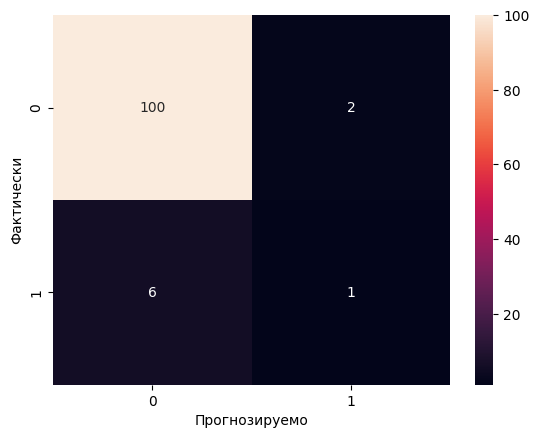

In [31]:
sns.heatmap(con_mat, annot=True, fmt="d"); #Создание тепловой карты на основе матрицы ошибок
plt.xlabel("Прогнозируемо"); #Подпись на оси Х на тепловой карте
plt.ylabel("Фактически"); #Подпись на оси Y на тепловой карте

In [32]:
metrics.accuracy_score(Y_test, Y_predict)

0.926605504587156

In [33]:
metrics.recall_score(Y_test, Y_predict)

0.14285714285714285

In [34]:
metrics.f1_score(Y_test, Y_predict)

0.2